In [64]:
import os
import sys

sys.path.append(os.getcwd())

aeolis_directory = r'/home/server/pi/homes/heminwas/update_aeolis/aeolis-python/aeolis'

model_directory = r'/home/server/pi/homes/heminwas/update_aeolis'

sys.path.append(aeolis_directory)
from console_debug import *

scenario = 'prof38_moisture_on'
run = os.path.join(model_directory, scenario +str('.txt'))
print(run)

# aeolis_debug(run)

/home/server/pi/homes/heminwas/update_aeolis/prof38_moisture_on.txt


In [65]:
print(2.87/(365.25*24*3600) *3600)
print(2.87*(1/365.23/24/3600) *3600)

0.0003274013232945471
0.00032741925179567217


In [66]:
import pandas as pd 
import numpy as np
import netCDF4 as nc
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import mat4py as mt

In [166]:
def extract_netcdf(file, fig_folder):
    
    run = nc.Dataset(file, 'r')
    # qs = run['qs'][:]
    # q = run['q'][:]
    # rhoveg = run['rhoveg'][:]
    # hveg = run['hveg'][:]
    # dhveg = run['hveg'][:]
    # dzbveg = run['dzbveg'][:]
    # pickup = run['pickup'][:]
    time = run['time'][:]

    # TWL = run['TWL'][:]
    try:
        dte = run['dte'][:]
        dte_clean =[]
        for i in range(0, len(time)):
            dte_clean.append(np.array(dte[i,0,0])[0])
    except: 
        dte_clean = np.nan
    try:
        beach_slope = run['beachslope'][:]
        bs_clean = []
        for i in range(0, len(time)):
            bs_clean.append(np.array(beach_slope[i,0,0])[0])
    except:
        bs_clean = np.nan
    
    try:
        zshore = run['zshore'][:]
        zshore_clean = []
        for i in range(0, len(time)):
            zshore_clean.append(np.array(zshore[i,0,0])[0])
    except:
        zshore_clean = np.nan
    
    try:
        xshore = run['xshore'][:]
        xshore_clean = []
        for i in range(0, len(time)):
            xshore_clean.append(np.array(xshore[i,0,0])[0])
    except:
        xshore_clean = np.nan
   
    x =  run['x'][0,:] #baselineb['x'][1,:].values
    zbi = run['zb'][0,0,:] # baselineb['zb'][0,1,:].values 
    zbf = run['zb'][-1,0,:]
    zb_all = run['zb'][:,0,:]
    
    run.close()
    
    #dhveg_fig = plt.figure()
    #for i in range(0,len(time)):
    #    plt.plot(x,dhveg[i,:])
    
    # prof_fig = plt.figure(figsize = (7,4))
    # plt.plot(x, zbi, color = 'black', linestyle = '--', label = 'Initial Profile')
    
    # colors_arr = plt.cm.viridis(np.linspace(0, 1, len(time)))
    
    # offset = 186
    # for i in range(0, len(time)):
    #     zb = run['zb'][i,0,:] #baselineb['zb'][i,1,:].values
    #     if time[i] == time[-1] or time[i] == time[0]:
    #         plt.plot(x, zb, color = colors_arr[i], label = time[i])
    #     else:
    #         plt.plot(x, zb, color = colors_arr[i])
    start_time = datetime(1997, 9, 17, 0, 0)
    dates = [start_time + timedelta(seconds = sec) for sec in time]
    # aeolis_times_J = time
    # aeolis_times = []
    # for i in range(0, len(aeolis_times_J)):
    #     time = aeolis_times_J[i]
    #     standard_datetime = datetime(
    #         time.year, time.month, time.day,
    #         time.hour, time.minute, time.second)
    #     aeolis_times.append(standard_datetime)
            
    # plt.plot((field_zf.index-offset), field_zf[::-1], color = 'black', label = 'Final Field Profile')
    # plt.legend()
    # plt.ylim([0,10])
    # plt.xlim([0, 435])
    # plt.xlabel('Cross-shore Distance (m)')
    # plt.ylabel('Elevation (m)')
    # # os.chdir(fig_folder)
    # plot_name = os.path.join(fig_folder,file[24:-3] + str('_fig.png'))
    # plt.savefig(plot_name)
    # plt.close()
    
    # final_plot = plt.figure(figsize = (7,4))
    # plt.plot(x, zbi, color = 'black', linestyle = '--', label = 'Initial Profile')
    # plt.plot(x, zbf, color = 'goldenrod', label = 'Final Modeled Profile')
    # plt.plot((field_zf.index-offset), field_zf[::-1], color = 'black', label = 'Final Field Profile')
    # plt.legend()
    # plt.ylim([0,10])
    # plt.xlim([0, 435])
    # plt.xlabel('Cross-shore Distance (m)')
    # plt.ylabel('Elevation (m)')
    # # os.chdir(fig_folder)
    # plot_name = os.path.join(fig_folder,file[24:-3] + str('_final_fig.png'))
    # plt.savefig(plot_name)
    # plt.close(
    return x, zbi, zbf, zb_all, time, dates, dte_clean, bs_clean, xshore_clean, zshore_clean #qs, q, rhoveg, hveg, dhveg, dzbveg, pickup, TWL

In [68]:
def plot_aeolis(x, zb_all, time, field_zf, fig_folder, figname ):
    colors_arr = plt.cm.viridis(np.linspace(0, 1, len(time)))

    fig = plt.figure(figsize = (8,5))
    plt.plot(x,zb_all[0,:], color = 'k', linestyle = '--', label = 'Initial Profile')
    for i in range(0, len(time)):
        if i==0 or i == len(time)-1:
            plt.plot(x, zb_all[i,:], color = colors_arr[i], label = dates[i])
        else:
            plt.plot(x, zb_all[i,:], color = colors_arr[i])
    offset = 186
    plt.plot(field_zf.index[::-1] - offset, field_zf, color = 'k', label = 'Final Field Profile')
    # plt.plot(x, zbf, label = 'Final Profile')
    plt.ylabel('Elevation (m)', fontsize = 14)
    plt.xlabel('Cross-shore Distance (m)', fontsize = 14)
    plt.legend(loc = 'upper left')
    os.chdir(fig_folder)
    plt.savefig(figname)

In [69]:

file = '/home/server/pi/homes/heminwas/Final_runs/Profile_38.mat'
line = mt.loadmat(file) 
start_time = datetime.fromtimestamp(np.array(line['Dates_unix'])[0])
# field_xi = line['Morph_Data'][0].index()
field_zi = pd.Series(line['Morph_Data'][0])
field_zf = pd.Series(line['Morph_Data'][-1])

/home/server/pi/homes/heminwas/update_aeolis/figures


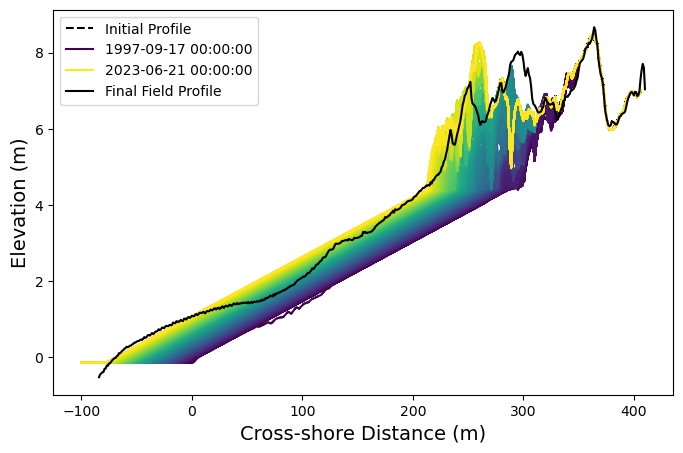

In [ ]:
# scenario = 'prof38_pos_SCR_ck'

file = scenario +'.nc'
path = os.path.join(model_directory, file)
fig_folder = os.path.join(model_directory,'figures')
print(os.getcwd())

x, zbi, zbf, zb_all, time, dates, dte, beach_slope = extract_netcdf(path,fig_folder) 
fig1 = plot_aeolis(x, zb_all,time, field_zf, fig_folder, 'moisture_off_SCR_off.png')

In [72]:
def get_volume(elevation, seaward_x, landward_x):
    """
    Determine volume under coastal profile between two points

    The volume of the coastal profile between a landward and seaward boundary 
    is determined by integrating over the surface beneath the coastal profile 
    between those two points. 

    Parameters
    ----------
    elevation : np.array
        np.array containing the elevation of the coastal profile in meters
    seaward_x : float or int
        Cross-shore seaward boundary
    landward_x : float or int
        Cross-shore landward boundary

    Returns
    -------
    float
        volume: surface under the graph in m^2. Can be interpreted as m^3 by 
        assuming the profile is 1 m wide.

    Author: Christa van Ijzendorn
    """
    # print(landward_x)
    from scipy import integrate
    if pd.isna(landward_x) == True:        
        # print('no landward_x value')
        if pd.isnull(seaward_x) == True: # or pd.isnull(landward_x) == True:
            volume = np.nan
            raise ValueError('Seaward or Landward = null')
    
        else:
            if elevation.iloc[1][0] > elevation.iloc[-1][0]:
                # raise ValueError('1')
                # Remove all elevation outside of boundaries
                # drop everything seaward of seaward boundary
                elevation = elevation.drop(
                    elevation.index[elevation.index > seaward_x]).interpolate()
                # elevation2 = elevation.drop(elevation.index[elevation.index < landward_x]).interpolate() # drop everything landward of landward boundary and interpolate remaining data
            elif elevation.iloc[0][0] < elevation.iloc[-1][0]:
                # raise ValueError('2')
                # drop everything seaward of seaward boundary
                elevation = elevation.drop(
                    elevation.index[elevation.index < seaward_x]).interpolate()
                # elevation2 = elevation.drop(elevation.index[elevation.index > landward_x]).interpolate()
            if elevation.empty == False:
                # raise ValueError('3')
                volume_y = elevation - elevation.min()
                volume_simps = integrate.simpson(
                    volume_y.values.transpose(), x=volume_y.index)
                volume = volume_simps
            else:
                volume = np.nan
                raise ValueError('Elevation is empty')
    else:

        if pd.isnull(seaward_x) == True: # or pd.isnull(landward_x) == True:
            volume = np.nan
            raise ValueError('Seaward or Landward = null')
    
        else:
            if elevation.iloc[1][0] > elevation.iloc[-1][0]:
                # raise ValueError('1')
                # Remove all elevation outside of boundaries
                # drop everything seaward of seaward boundary
                elevation = elevation.drop(
                    elevation.index[elevation.index > seaward_x]).interpolate()
                elevation2 = elevation.drop(elevation.index[elevation.index < landward_x]).interpolate() # drop everything landward of landward boundary and interpolate remaining data
            elif elevation.iloc[0][0] < elevation.iloc[-1][0]:
                # raise ValueError('2')
                # drop everything seaward of seaward boundary
                elevation = elevation.drop(
                    elevation.index[elevation.index < seaward_x]).interpolate()
                elevation2 = elevation.drop(elevation.index[elevation.index > landward_x]).interpolate()
            if elevation.empty == False:
                # raise ValueError('3')
                volume_y = elevation2 - elevation2.min()
                volume_simps = integrate.simpson(
                    volume_y.values.transpose(), x=volume_y.index)
                volume = volume_simps
            else:
                volume = np.nan
                raise ValueError('Elevation is empty')
        # print(volume *0.1)
    return volume

vol_lim = 4
vol_overtime = []

for i in range(0,len(dates)):
    z = pd.DataFrame(zb_all[i,:])
    seaward_x = np.where(abs(zb_all[i,:]-vol_lim) == min(abs(zb_all[i,:]-vol_lim)))[0][0]
    vol = get_volume(z, seaward_x, np.nan)[0]
    vol_overtime.append(vol)
    

Text(0.5, 0, 'Time')

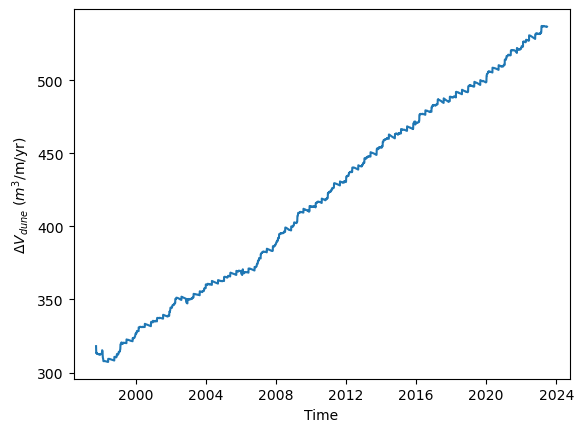

In [73]:
plt.figure()
plt.plot(dates, vol_overtime)
plt.ylabel('$\Delta V_{\t{dune}}$ ($m^3$/m/yr)')
plt.xlabel('Time')

In [171]:
#load wetbedreset 
scen1 = 'prof38_wetbedreset_final'
file = scen1 +'.nc'
path = os.path.join(model_directory, file)
fig_folder = os.path.join(model_directory,'figures')
print(os.getcwd())

x_wetbed, zbi, zbf, zb_all_wetbed, time, dates_wetbed, dte_wetbed, beach_slope_wetbed, xshore_wetbed, zshore_wetbed = extract_netcdf(path,fig_folder) 

vol_lim = 3
vol_wetbed = []

for i in range(0,len(dates_wetbed)):
    z = pd.DataFrame(zb_all_wetbed[i,:])
    seaward_x = np.where(abs(zb_all_wetbed[i,:]-vol_lim) == min(abs(zb_all_wetbed[i,:]-vol_lim)))[0][0]
    vol = get_volume(z, seaward_x, np.nan)[0]
    vol_wetbed.append(vol)
print(np.min(zb_all_wetbed))
#load beach growth 
scen2 = 'prof38_beach_growth'
file = scen2 +'.nc'
path = os.path.join(model_directory, file)
fig_folder = os.path.join(model_directory,'figures')
print(os.getcwd())

x_bg, zbi, zbf, zb_all_bg, time, dates_bg, dte_bg, beach_slope_wetbed, xshore_bs, zshore_bs = extract_netcdf(path,fig_folder) 

vol_bg = []

for i in range(0,len(dates_bg)):
    z = pd.DataFrame(zb_all_bg[i,:])
    seaward_x = np.where(abs(zb_all_bg[i,:]-vol_lim) == min(abs(zb_all_bg[i,:]-vol_lim)))[0][0]
    vol = get_volume(z, seaward_x, np.nan)[0]
    vol_bg.append(vol)

#load shoreline change rate 
scen3 = 'prof38_moisture_on_nooffshore'
file = scen3 +'.nc'
path = os.path.join(model_directory, file)
fig_folder = os.path.join(model_directory,'figures')
print(os.getcwd())

x_scr, zbi, zbf, zb_all_scr, time, dates_scr, dte_scr, beach_slope_scr, xshore_scr, zshore_scr= extract_netcdf(path,fig_folder) 

vol_scr = []

for i in range(0,len(dates_scr)):
    z = pd.DataFrame(zb_all_scr[i,:])
    seaward_x = np.where(abs(zb_all_scr[i,:]-vol_lim) == min(abs(zb_all_scr[i,:]-vol_lim)))[0][0]
    vol = get_volume(z, seaward_x, np.nan)[0]
    vol_scr.append(vol)

#load time varying tanB 
scen4 = 'prof38_constant_SCR_variable_tanB'
file = scen4 +'.nc'
path = os.path.join(model_directory, file)
fig_folder = os.path.join(model_directory,'figures')
print(os.getcwd())

x_tanb, zbi, zbf, zb_all_tanb, time, dates_tanb, dte_tanb, beach_slope_tanb, xshore_tanb, zshore_tanb = extract_netcdf(path,fig_folder) 

vol_tanb = []

for i in range(0,len(dates_tanb)):
    z = pd.DataFrame(zb_all_tanb[i,:])
    seaward_x = np.where(abs(zb_all_tanb[i,:]-vol_lim) == min(abs(zb_all_tanb[i,:]-vol_lim)))[0][0]
    vol = get_volume(z, seaward_x, np.nan)[0]
    vol_tanb.append(vol)


/home/server/pi/homes/heminwas/update_aeolis/figures
-0.14466187357902527
/home/server/pi/homes/heminwas/update_aeolis/figures
/home/server/pi/homes/heminwas/update_aeolis/figures
/home/server/pi/homes/heminwas/update_aeolis/figures


In [ ]:
zshore_tanb

nan

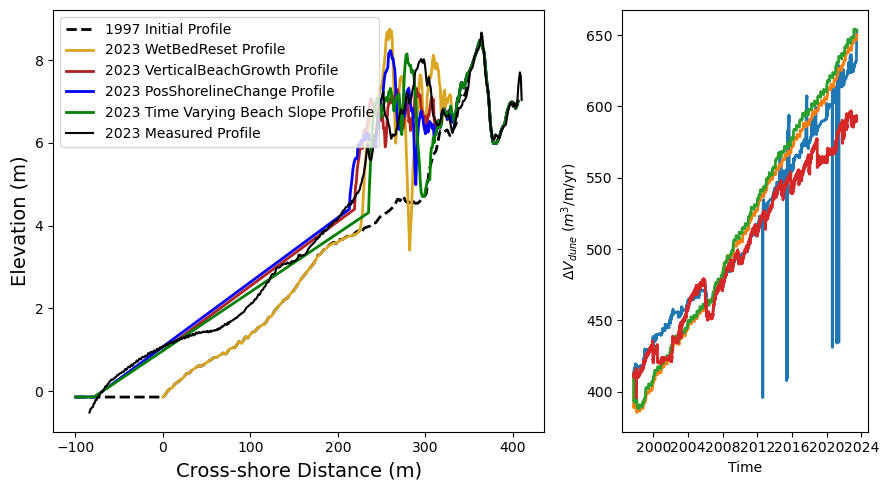

In [144]:
#make schematic 
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (9,5),gridspec_kw={'width_ratios': [2, 1]})
ax1.plot(x, zb_all[0,:], linewidth = 2, linestyle = '--', color = 'k', label = '1997 Initial Profile')
ax1.plot(x_wetbed, zb_all_wetbed[-1,:], linewidth = 2, color = 'goldenrod', label = '2023 WetBedReset Profile')
ax1.plot(x_bg, zb_all_bg[-1,:], linewidth = 2, color = 'firebrick', label = '2023 VerticalBeachGrowth Profile')
ax1.plot(x_scr, zb_all_scr[-1,:], linewidth = 2, color = 'blue', label = '2023 PosShorelineChange Profile')
ax1.plot(x_tanb, zb_all_tanb[-1,:], linewidth = 2, color = 'green', label = '2023 Time Varying Beach Slope Profile')

offset = 186
ax1.plot(field_zf.index[::-1] - offset, field_zf, color = 'k', label = '2023 Measured Profile')
    # plt.plot(x, zbf, label = 'Final Profile')
ax1.set_ylabel('Elevation (m)', fontsize = 14)
ax1.set_xlabel('Cross-shore Distance (m)', fontsize = 14)
ax1.legend(loc = 'upper left')

ax2.plot(dates_wetbed, vol_wetbed, linewidth = 2)
ax2.plot(dates_bg, vol_bg, linewidth = 2)
ax2.plot(dates_scr, vol_scr, linewidth = 2)
ax2.plot(dates_tanb, vol_tanb, linewidth = 2)
ax2.set_ylabel('$\Delta V_{\t{dune}}$ ($m^3$/m/yr)')
ax2.set_xlabel('Time')
plt.tight_layout()


[ 9496. 10957. 12418. 13879. 15340. 16801. 18262. 19723.]


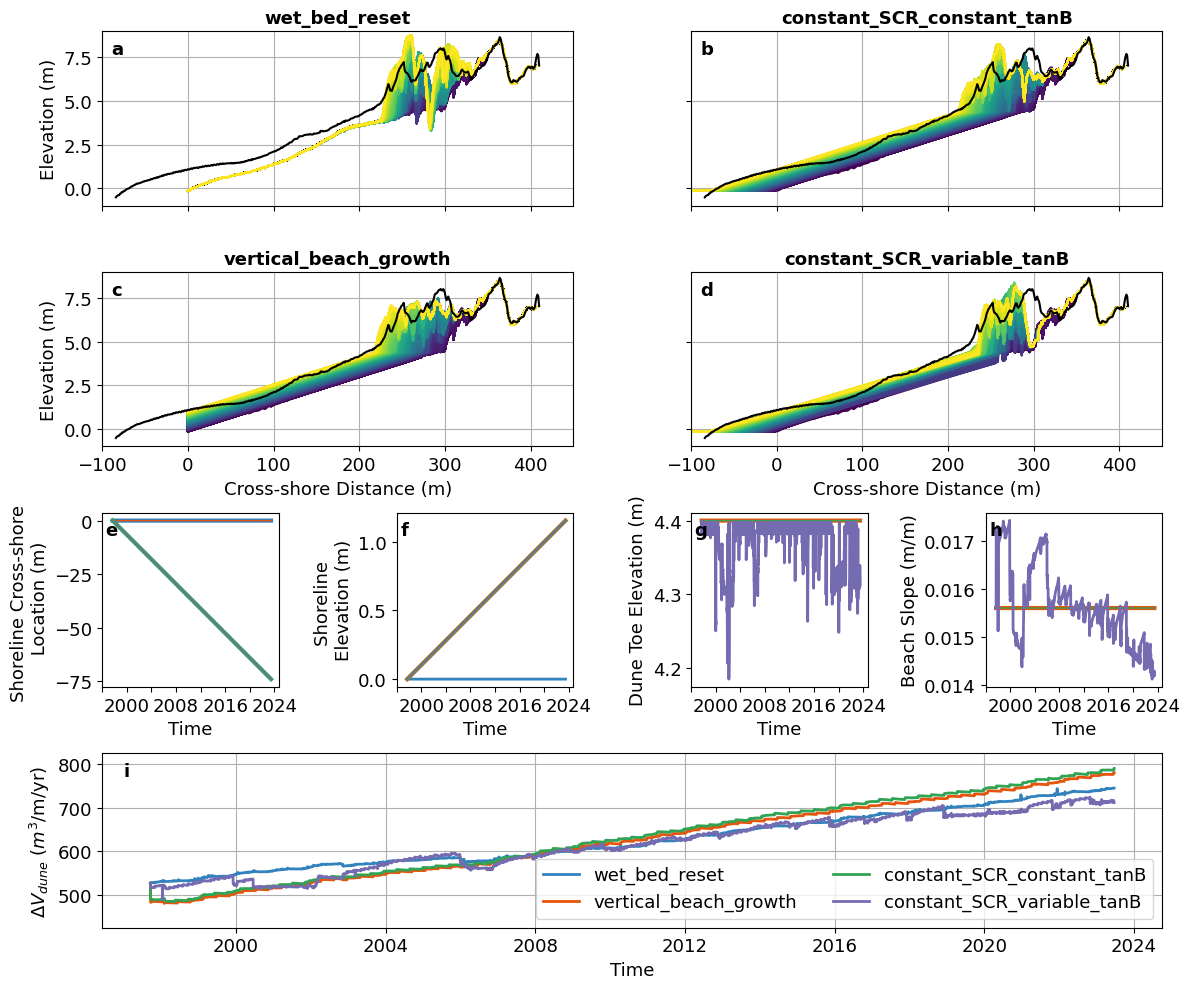

In [200]:
def plot(ax, x, zb_all, time, xticks, yticks,title):
    colors_arr = plt.cm.viridis(np.linspace(0, 1, len(time)))
    ax.grid()
    ax.set_title(title, fontsize = 13, fontweight = 'bold')
    ax.plot(x,zb_all[0,:], color = 'k', linestyle = '--', label = 'Initial Profile')
    for i in range(0, len(time)):
            if i==0 or i == len(time)-1:
                ax.plot(x, zb_all[i,:], color = colors_arr[i], label = dates[i])
            else:
                ax.plot(x, zb_all[i,:], color = colors_arr[i])
    offset = 186
    ax.plot(field_zf.index[::-1] - offset, field_zf, color = 'k', label = 'Final Field Profile')
    if xticks == 0:
         ax.set_xticks(ax.get_xticks(),[])
    else:
         ax.set_xlabel('Cross-shore Distance (m)')
    if yticks == 0:
         ax.set_yticks(ax.get_yticks(),[])
    else:
         ax.set_ylabel('Elevation (m)')
    ax.set_ylim([-1,9])
    ax.set_xlim([-100,450])

cmap = plt.cm.tab20c

layout = '''
aabb
ccdd
efgh
iiii'''

font_size = 13

schem_fig, axes= plt.subplot_mosaic(layout, figsize = (12,10))

for i, (key, ax) in enumerate(axes.items()):
    # Tick size
    ax.tick_params(axis='both', labelsize=font_size)

    # Axis label size
    if key not in ['a','b']:
        ax.set_xlabel("X Label", fontsize=font_size)
    if key not in ['b','d']:
        ax.set_ylabel("Y Label", fontsize=font_size)

    # Add (a), (b), ... in top-left corner of each subplot
    ax.text(
        0.02, 0.95, str(key),
        transform=ax.transAxes,
        fontsize=font_size,
        fontweight='bold',
        va='top',
        ha='left'
    )

plot(axes['a'], x_wetbed, zb_all_wetbed, time, 0,1, 'wet_bed_reset')
plot(axes['b'], x_scr, zb_all_scr,time, 0,0, 'constant_SCR_constant_tanB')
plot(axes['c'], x_bg, zb_all_bg, time, 1,1, 'vertical_beach_growth')
plot(axes['d'], x_tanb, zb_all_tanb, time, 1,0, 'constant_SCR_variable_tanB')

axes['e'].plot(dates, np.zeros(len(dates)), color = cmap(0), linewidth = 3, label = 'wet_bed_reset')
axes['e'].plot(dates, np.zeros(len(dates)), color = cmap(4), linewidth = 1, label = 'vertical_beach_growth')
axes['e'].plot(dates, xshore_tanb, color = cmap(8), linewidth = 3, label = 'constant_SCR_constant_tanB')
axes['e'].plot(dates, xshore_tanb, color = cmap(12), linewidth = 1, label = 'constant_SCR_variable_tanB')
axes['e'].set_ylabel('Shoreline Cross-shore \n Location (m)')
axes['e'].set_xlabel('Time')
print(axes['e'].get_xticks())
axes['e'].set_xticks(axes['e'].get_xticks(),['','2000', '', '2008', '', '2016', '' , '2024']) 

axes['f'].plot(dates, np.zeros(len(dates)), color = cmap(0), linewidth = 2, label = 'wet_bed_reset')
axes['f'].plot(dates, zshore_tanb, color = cmap(4), linewidth = 3, label = 'vertical_beach_growth')
axes['f'].plot(dates, zshore_tanb, color = cmap(8), linewidth = 2, label = 'constant_SCR_constant_tanB')
axes['f'].plot(dates, zshore_tanb, color = cmap(12), linewidth = 1, label = 'constant_SCR_variable_tanB')
axes['f'].set_ylabel('Shoreline \nElevation (m)')
axes['f'].set_xlabel('Time')
axes['f'].set_xticks(axes['f'].get_xticks(),['','2000', '', '2008', '', '2016', '' , '2024']) 

dune_toe_elevation = 4.4
axes['g'].plot(dates, np.ones(len(dates))*dune_toe_elevation, color = cmap(4), linewidth = 3, label = 'vertical_beach_growth')
axes['g'].plot(dates, np.ones(len(dates))*dune_toe_elevation, color = cmap(8), linewidth = 1, label = 'constant_SCR_constant_tanB')
axes['g'].plot(dates, dte_tanb, color = cmap(12), linewidth = 2, label = 'constant_SCR_variable_tanB')
axes['g'].set_ylabel('Dune Toe Elevation (m)')
axes['g'].set_xlabel('Time')
axes['g'].set_xticks(axes['g'].get_xticks(),['','2000', '', '2008', '', '2016', '' , '2024']) 

beach_slope = 0.0156
axes['h'].plot(dates, np.ones(len(dates))*beach_slope, color = cmap(4), linewidth = 3, label = 'vertical_beach_growth')
axes['h'].plot(dates, np.ones(len(dates))*beach_slope, color = cmap(8), linewidth = 1, label = 'constant_SCR_constant_tanB')
axes['h'].plot(dates, beach_slope_tanb, color = cmap(12), linewidth = 2, label = 'constant_SCR_variable_tanB')
axes['h'].set_ylabel('Beach Slope (m/m)')
axes['h'].set_xlabel('Time')
axes['h'].set_xticks(axes['h'].get_xticks(),['','2000', '', '2008', '', '2016', '' , '2024'])

axes['i'].grid()
axes['i'].plot(dates, vol_wetbed, color = cmap(0), linewidth=2, label = 'wet_bed_reset')
axes['i'].plot(dates, vol_bg,  color = cmap(4), linewidth =2, label = 'vertical_beach_growth')
axes['i'].plot(dates, vol_scr, color = cmap(8), linewidth = 2, label = 'constant_SCR_constant_tanB')
axes['i'].plot(dates, vol_tanb, color = cmap(12), linewidth = 2, label = 'constant_SCR_variable_tanB')
axes['i'].set_ylabel('$\Delta V_{\t{dune}}$ ($m^3$/m/yr)')
axes['i'].set_xlabel('Time')
axes['i'].set_ylim([425,825])
axes['i'].legend(loc = 'lower right',ncol = 2, fontsize = 13)

plt.tight_layout()

plt.savefig('aeolis_sed_supply.png', dpi = 600)

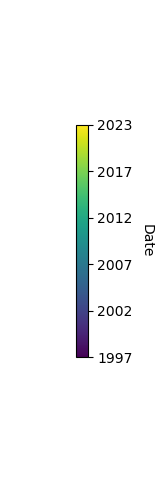

<Figure size 640x480 with 0 Axes>

In [199]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Create a dummy scalar mappable to generate the colorbar
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=1997, vmax=2023)

fig, ax = plt.subplots(figsize=(1, 6))  # Tall narrow figure for vertical bar
# fig.subplots_adjust(right=0.5)  # Shrink to leave space for colorbar

# Hide the main axes (not needed)
ax.axis('off')

# Add vertical colorbar
cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=ax,
    orientation='vertical',
    shrink=1
)

# Format tick labels as integers (years)
cbar.set_ticks(np.linspace(1997, 2023, 6))  # e.g., 1997, 2002, 2008, ...
cbar.ax.set_yticklabels([f"{int(year)}" for year in np.linspace(1997, 2023, 6)])

# Add label
cbar.set_label('Date', rotation=270, labelpad=15)

plt.show()

plt.savefig('colorbar.png', dpi = 600)